# Лабораторная работа 3
Классификация в sklearn. Метрики классификации

Выполнил: Гершевский Егор Владимирович, гр. 6131-010402D

0.  Выберите наборы данных, подходящие для многоклассовой и бинарной классификации. Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from warnings import filterwarnings
filterwarnings("ignore")

In [199]:
df = pd.read_csv("/Users/egorgersevskij/Desktop/University/Магистратура/2/Инструменты анализа данных/tasks/datasets/bodyPerformance.csv")

In [200]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Представленный датафрейм содержит следующие столбцы:
кол-во данных - (13393, 12)

Возраст: от 20 до 64

Пол: Ж - женский, М - мужской

Рост (см)

Вес (кг)

Телесный жир (%)

Диастолическое: диастолическое кровяное давление (мин)

Систолическое: систолическое артериальное давление (мин)

Сила захвата 

Сидеть и наклоняться вперед (см)

Количество приседаний (кол-во раз)

Прыжок в длину (см)

Класс: A,B,C,D (A: лучший, D: худший)

**1. Многоклассовая классификация:**

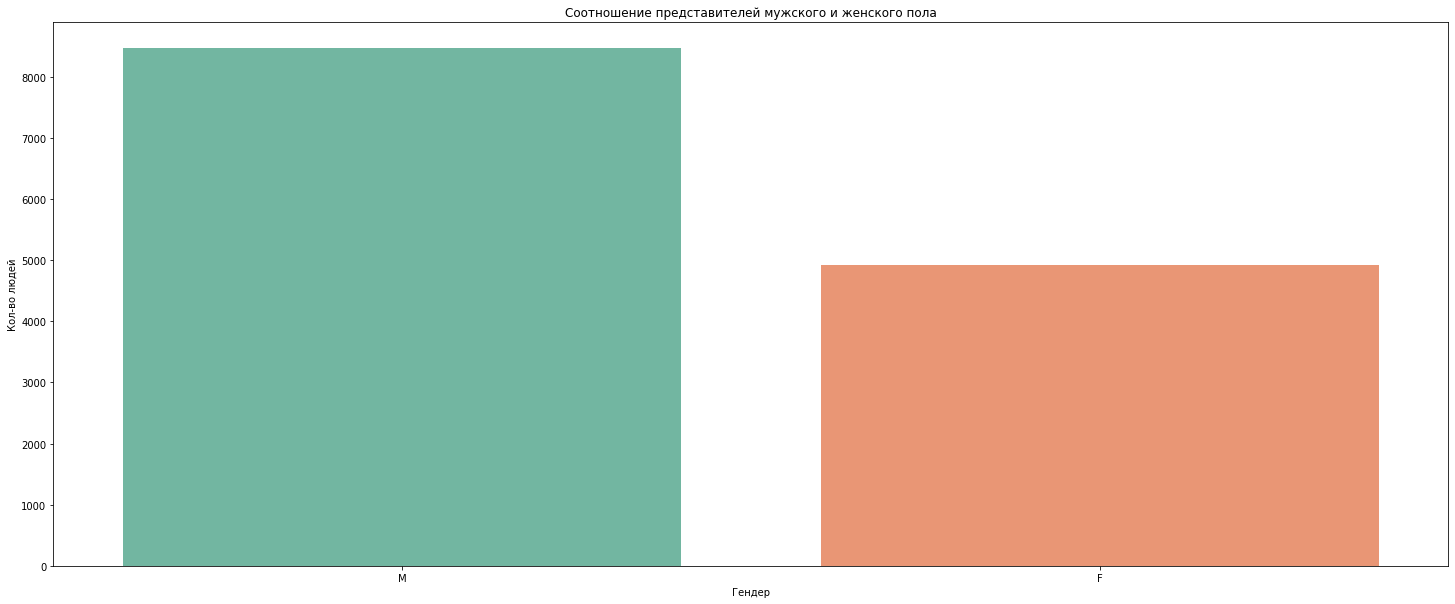

In [201]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(df["gender"], palette="Set2")
ax.set(title="Соотношение представителей мужского и женского пола")
plt.ylabel("Кол-во людей")
plt.xlabel("Гендер")
plt.show()

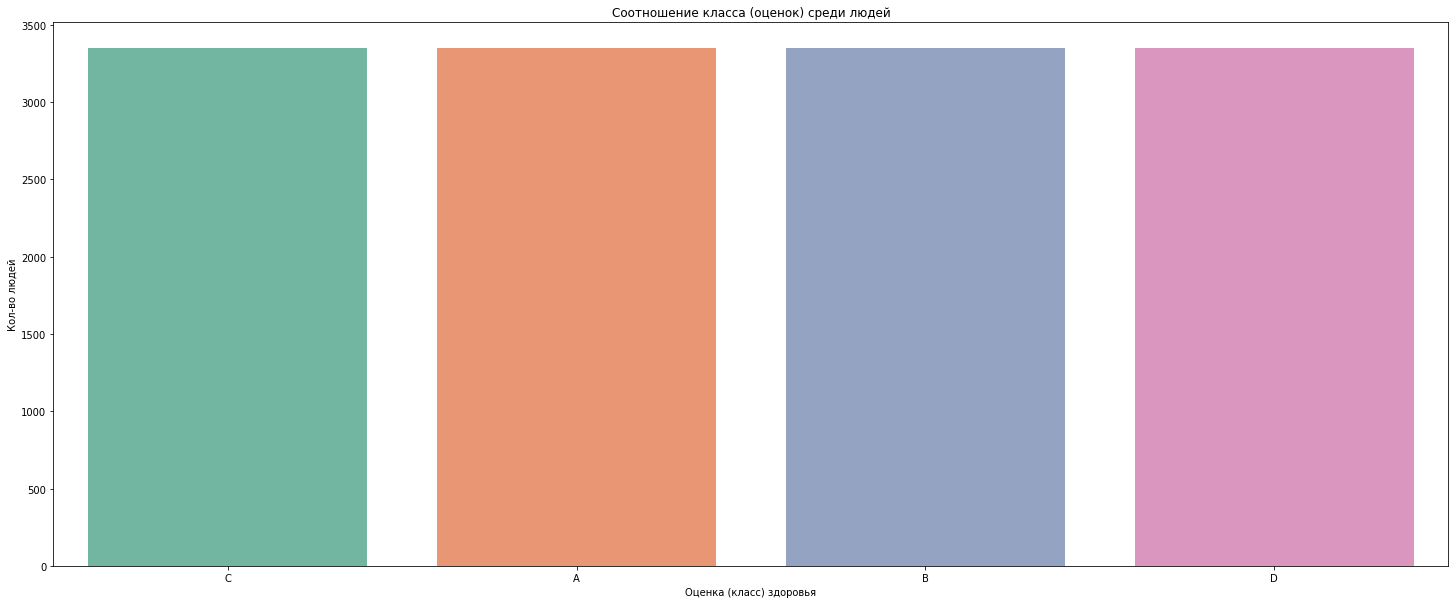

In [202]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(df["class"], palette="Set2")
ax.set(title="Соотношение класса (оценок) среди людей")
plt.ylabel('Кол-во людей')
plt.xlabel('Оценка (класс) здоровья')
plt.show()

In [203]:
df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [204]:
df["gender"] = df["gender"].replace({"M": 0, "F": 1})

In [205]:
df["class"] = df["class"].replace({"A": 0, "B": 1, "C": 2, "D": 3})

In [222]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [207]:
X, y = df.drop("class", axis=1), df["class"]

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify=y, random_state=7)

In [254]:
#Splitting the data into independent and dependent variables
print('The independent features set: ')
print(X)
print('The dependent variable: ')
print(y)

The independent features set: 
        age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0      27.0       0      172.3      75.24        21.3       80.0     130.0   
1      25.0       0      165.0      55.80        15.7       77.0     126.0   
2      31.0       0      179.6      78.00        20.1       92.0     152.0   
3      32.0       0      174.5      71.10        18.4       76.0     147.0   
4      28.0       0      173.8      67.70        17.1       70.0     127.0   
...     ...     ...        ...        ...         ...        ...       ...   
13388  25.0       0      172.1      71.80        16.2       74.0     141.0   
13389  21.0       0      179.7      63.90        12.1       74.0     128.0   
13390  39.0       0      177.2      80.50        20.1       78.0     132.0   
13391  64.0       1      146.1      57.70        40.4       68.0     121.0   
13392  34.0       0      164.0      66.10        19.5       82.0     150.0   

       gripForce  sit and bend f

In [270]:
# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [271]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [272]:
# Fitting GradientBoostingClassifier to the Training set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
model = classifier.fit(X_train, y_train)

In [273]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [274]:
# Predicting the Test set results
y_pred = model.predict(X_test)
# Making the Confusion Matrix
print('Accuracy: %2.2f' %accuracy_score(y_pred, y_test), '%')
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print('Matrix \n', confusion_matrix(y_pred, y_test))

Accuracy: 0.72 %
Matrix 
 [[731 203  77  16]
 [106 498 193  59]
 [  2 100 534 108]
 [  2  26  45 649]]


1.2. То же самое с использованием кросс-валидации

In [244]:
import numpy as np
from sklearn.model_selection import cross_val_score

X, y = df.drop("class", axis=1), df["class"]

clf = GradientBoostingClassifier(n_estimators=30, random_state=42)
# передаем классификатор, X, y и кол-во фолдов=10
res = cross_val_score(clf, X, y, cv=10)
 
print(res)
print(np.mean(res))

[0.62835821 0.67014925 0.65373134 0.65421957 0.67064974 0.64600448
 0.64899178 0.63480209 0.65421957 0.66691561]
0.6528041643908911


1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра (в лекции есть пример построения подобного графика для kNN и датасета cancer, но можно строить как угодно такой график)

In [251]:
min_samples_leaf = np.linspace(0.01, 0.1, 10, endpoint=True)
accuracy_test = []
accuracy_train = []

for number in min_samples_leaf:
    GBC = GradientBoostingClassifier(min_samples_leaf=number)
    
    GBC.fit(X_train, y_train)
    GBCPredict = GBC.predict(X_train)
    accuracy_train.append(accuracy_score(y_train, GBCPredict))
    
    GBC.fit(X_test, y_test)
    GBCPredict = GBC.predict(X_test)
    accuracy_test.append(accuracy_score(y_test, GBCPredict))

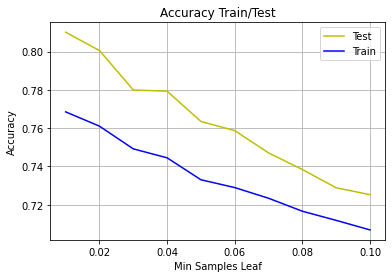

In [252]:
plt.plot(min_samples_leaf, accuracy_test, color="y", label="Test")
plt.plot(min_samples_leaf, accuracy_train, color="b", label='Train')
plt.title("Accuracy Train/Test")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Отметим, что чем больше объектов в листе, тем ниже падает точность, что на тестовой выборке, что и на обучающей

1.4. Построить confusion matrix (это вроде матрицы TN / TP/ FN/ FP, только расширенной для многоклассовой классификации, чтобы понять в какие стороны чаще ошибается классификатор). ([пример](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)):

<AxesSubplot:>

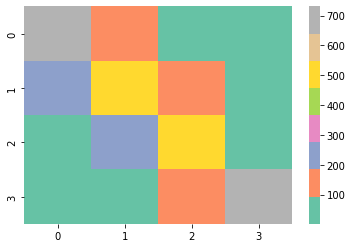

In [256]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)
GBCPredict = GBC.predict(X_test)
sns.heatmap(confusion_matrix(y_test, GBCPredict), cmap="Set2")

**2. Бинарная классификация.**

На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить `classification_report`


In [276]:
X_bin, y_bin = df.drop("gender", axis=1), df["gender"]

In [277]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, 
                                                                    y_bin, 
                                                                    test_size=.25, 
                                                                    stratify=y, 
                                                                    random_state=7)

In [290]:
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

GBC = GradientBoostingClassifier()
GBC.fit(X_train_bin, y_train_bin)
GBCPredict = GBC.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, GBCPredict)
print(f"Accuracy: %2.3f" % accuracy)
preecision = precision_score(y_test_bin, GBCPredict)
print(f"Precision: %2.3f" % preecision)
recall = recall_score(y_test_bin, GBCPredict)
print(f"Recall: %2.3f" % recall)
F1 = f1_score(y_test_bin, GBCPredict)
print(f"F1-score: %2.3f" % F1)
print(f"Classification report:\n {classification_report(y_test_bin, GBCPredict)}")

Accuracy: 0.985
Precision: 0.981
Recall: 0.979
F1-score: 0.980
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2103
           1       0.98      0.98      0.98      1246

    accuracy                           0.99      3349
   macro avg       0.98      0.98      0.98      3349
weighted avg       0.99      0.99      0.99      3349




**3. Использование нормализации признаков**
В обоих задачах (бинарной и многоклассовой классификации) попробовать также вариант с предварительной нормализацией признаков (`StandardScaler`или `MinMaxScaler`). Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [291]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_multi_scaler = scaler.fit_transform(X_train)
X_test_multi_scaler = scaler.fit_transform(X_test)

X_train_bin_scaler = scaler.fit_transform(X_train_bin)
X_test_bin_scaler = scaler.fit_transform(X_test_bin)

In [294]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_multi_scaler, y_train)
GBCPredict = GBC.predict(X_test_multi_scaler)
accuracy = accuracy_score(y_test, GBCPredict)
print(f"Accuracy: %2.3f" % accuracy)
print(f"Classification report:\n {classification_report(y_test, GBCPredict)}")

Accuracy: 0.477
Classification report:
               precision    recall  f1-score   support

           0       0.48      0.82      0.61       841
           1       0.36      0.11      0.16       827
           2       0.43      0.20      0.27       849
           3       0.51      0.78      0.62       832

    accuracy                           0.48      3349
   macro avg       0.44      0.48      0.41      3349
weighted avg       0.44      0.48      0.41      3349



In [296]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_bin_scaler, y_train_bin)
GBCPredict = GBC.predict(X_test_bin_scaler)
accuracy = accuracy_score(y_test_bin, GBCPredict)
print(f"Accuracy: %2.3f" % accuracy)
print(f"Classification report:\n {classification_report(y_test_bin, DTCPredict)}")

Accuracy: 0.964
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2103
           1       0.98      0.98      0.98      1246

    accuracy                           0.99      3349
   macro avg       0.98      0.98      0.98      3349
weighted avg       0.99      0.99      0.99      3349

